Title : KOSPI Index Predicting Project<br>
Participants : <blockquote> <br>Park Su Young (mak8mgt07@naver.com, https://github.com/vvvv1111vvvv)<br>Lee Donghwan(hwany1227@gmail.com, <br>www.linkedin.com/in/donghwanlee7)</blockquote><br>
ate Created : 2022.06.28 ~ 2022.07.18<br>
Roles : <br>
<blockquote> <br>
Park Su Young : KOSPI Index Crawling/Processing,  Data Correlation Analysis,  Deep Learning & Performance Analysis<br><br>
 Lee Donghwan : Building Macroeconomics Index DB, Implementing Risk Analysis.
</blockquote>
Purpose : Analyze the correlation between the KOSPI index and economic indicators and use deep learning to predict the future KOSPI index.<br>

Method: <br>
<blockquote>(1) Crawl economic indicators on the Bank of Korea's web page and process them.<br>
(2) Crawls the KOSPI index on the Naver finance and processes it<br>
(3) Collect and Organize the data obtained in the previous step based on the business days between 2015.07.24 and 2022.07.01"<br>
(4) Add GJR-GARCH(p,q) model value to the summarized data<br>
(5) Normalize the organized data<br>
(6) Analyze the organized data to identify the correlation,and modify the data structure to predict "1 day" with "5 days". <blockquote>train_date: "2015.07.24 ~ 2021.06.30" <br>test_date: "2021.07.01 ~ 2022.07.01"</blockquote><br>
(7) Design Multi-layers with LSTM, Dense. Train Data with the Model. Compare the actual KOSPI value of 2021.07.01~2022.07.01 period with the predicted KOSPI value(1 day will be estimated by 5 days at CNN model), feature comparing graph and predictive performance index.
<br><br><br>



제목: KOSPI 예측 프로젝트 <br>
작성자: <blockquote><br>박수영 (mak8mgt07@naver.com, https://github.com/vvvv1111vvvv)<br>
이동환(hwany1227@gmail.com,
www.linkedin.com/in/donghwanlee7)
</blockquote><br>

작성일: 2022.06.28 ~ 2022.07.18<br>
역할: <br>
<blockquote> <br>
박수영: KOSPI인덱스 크롤링/가공, 데이터 상관관계 분석, 딥러닝 학습 및 성능분석<br>
이동환: 거시경제지표 DB 구축, GJR-GARCH(1,1) 모형을 이용한 리스크 분석

</blockquote>
목적: KOSPI 지수와 경제지표 사이의 상관관계를 분석하고, 딥러닝을 활용해 KOSPI지수를 예측한다. <br>
방법: <br>
<blockquote>(1) 한국은행 웹페이지에서 경제지표를 크롤링 한 뒤 가공한다.<br>
(2) Naver finance 에서 KOSPI 인덱스를 크롤링 한 뒤 가공한다.<br>
(3) 이전 단계에서 획득한 데이터를 취합하고, "2015.07.24 ~ 2022.07.01"동안의 영업일을 기준으로 정리한다.<br>
(4) 정리한 데이터에 GJR-GARCH(p,q) 모형값을 추가한다.<br>
(5) 정리한 데이터를 정규화한다.<br>
(6) 정리한 데이터를 분석하여 상관관계를 파악하고, "5 days"로 "1day"를 예측하도록 데이터 구조를 수정한다. <blockquote>train_date: "2015.07.24 ~ 2021.06.30" <br>test_date: "2021.07.01 ~ 2022.07.01"</blockquote><br>
(7) LSTM과 Dense로 다층 Layer를 설계하고 train 데이터를 학습시킨다. 그 다음, 'adam'을 사용해 "2021.07.01~2022.07.01 기간의 실제 KOSPI값"과, "실제 5day로 추정한 1day씩의 예측 KOSPI값"을 비교하여 그래프와 예측성능 지표로 출력한다. 


# 새 섹션

# **1. 경제지표 API 크롤링 (출처 : 한국은행) (Economic Indicators Crawling)**

In [30]:
import requests
import pandas as pd
import math

#100대 통계지표 요청 url
url = "http://ecos.bok.or.kr/api/KeyStatisticList/R0FQKORGKXRKG6CIJS2V/json/kr/1/100/"
resp = requests.get(url)
data = resp.json()
rdata = data['KeyStatisticList']['row']

df = pd.DataFrame(rdata)
indice = df.KEYSTAT_NAME

API
 한국은행 ECOS API (인증키 : R0FQKORGKXRKG6CIJS2V )

raw 데이터 관련
 info) 주가가 5만-10만원인 종목은 100원, 10만-50만원인 종목은 500원 간격으로 거래된다. <br>
 info) 한국은행 경제변수 - 분기별/월별/일별 자료 데이터.. 데이터 전처리시 참고 <br>
 


In [31]:
pd.read_csv("/content/ECOSindex.csv") #조사할 지표와와 호출부호

,명칭,코드명,사이클,코드1,코드2
0,GDP-총액,200Y002,Q,10111,NaN
1,GDP-비농림어업,200Y002,Q,10112,NaN
2,GDP-농림어업,200Y002,Q,10113,NaN
3,GDP-제조,200Y002,Q,10114,NaN
4,GDP-건설,200Y002,Q,10115,NaN
5,GDP-서비스업,200Y002,Q,10116,NaN
6,GDP-ICT,200Y002,Q,10117,NaN
7,GDP-비ICT,200Y002,Q,10118,NaN
8,GDP-민간소비,200Y002,Q,10122,NaN
9,투자-설비,200Y002,Q,10123,NaN


In [32]:
#세부 통계 데이터 조회
#url = "http://ecos.bok.or.kr/api/StatisticSearch(세부통계조회)/sample(인증키)/json(데이터 표시 형식)
#/kr(언어)/1(시작번호)/10(끝번호)/200Y001(통계표코드)/A(주기:A/S/Q/SM/D)/2015(검색시작일자)/2021(검색종료일자)
#/10101(통계항목1코드)/1010101(통계항목2코드)/10102(통계항목3코드)/?(통계항목4코드)"


## 한국은행 API url 주소 함수##
def ecos_url(startnum=None,endnum=None,statcode=None,cycle=None,startdate=None,enddate=None,msc1=None,msc2=None,msc3=None,msc4=None):
    url = "http://ecos.bok.or.kr/api/StatisticSearch/R0FQKORGKXRKG6CIJS2V/json/kr" 
    if not startnum is None : url = url + "/" + str(startnum)
    if not endnum is None : url = url + "/" + str(endnum)
    if not statcode is None : url = url + "/" + str(statcode)
    if not cycle is None : url = url + "/" + str(cycle)
    if not startdate is None: url = url + "/" + str(startdate)
    if not enddate is None: url = url + "/" + str(enddate)
    if not msc1 is None : url = url + "/" + str(msc1)
    if not msc2 is None : url = url + "/" + str(msc2)
    if not msc3 is None : url = url + "/" + str(msc3)
    if not msc4 is None : url = url + "/" + str(msc4)
    return url

#Test용 URL
url = ecos_url(1,10,"722Y004","M","202107","202205","101000")
#ecos_stat(url)


#데이터 조회함수
def ecos_stat(url):
    resp = requests.get(url)
    print(resp.status_code) #API 서버 메세지
    data = resp.json()
    sdata = data['StatisticSearch']['row']
    ecos_df = pd.DataFrame(sdata)
    a = ecos_df['ITEM_NAME1']
    a = a[0]
    #a = a['ITEM_NAME1'] # 첫번째 행 추출, 데이터프레임 키값 얻는용
    prcs_df = ecos_df[['TIME','DATA_VALUE']]
    prcs_df.columns = ['TIME',a]
    
    b = len(prcs_df)

    for i in range(0,b):
        x = str(prcs_df.loc[i,'TIME'])
        c = x[4] 
        d = x[5] 
        e = x[0:4] 
        if c == "Q" : 
            if d == "1" : prcs_df.loc[i,'TIME'] = e +"0331"
            if d == "2" : prcs_df.loc[i,'TIME'] = e +"0630"
            if d == "3" : prcs_df.loc[i,'TIME'] = e +"0930"
            if d == "4" : prcs_df.loc[i,'TIME'] = e +"1231"

        if len(prcs_df.loc[i,'TIME']) == 6 : prcs_df.loc[i,'TIME'] = x + "01"
    return prcs_df

In [33]:
import datetime


csv = pd.read_csv('/content/ECOSindex.csv') #주의, 엑셀로 한 번 연 뒤 업로드시 코드 내 '0' 사라짐, 디스코드 내 파일 사용

startdate = str(20150701) #API 요청인자(시작일)
enddate = str(20220701) #API 요청인자(종료일)
startnum = 1 #API 요청인자(요청건수-시작)

dt_startdate = datetime.datetime(int(startdate[0:4]),int(startdate[4:6]),int(startdate[6:8]))
dt_enddate = datetime.datetime(int(enddate[0:4]),int(enddate[4:6]),int(enddate[6:8]))
datediff = dt_enddate-dt_startdate
endnum = datediff.days -1 #API 요청인자(요청건수-마지막)

#daterange :날짜 스트링 -> Datetime 형식으로 변환 
drange = pd.date_range(datetime.datetime.strptime(startdate, "%Y%m%d"),datetime.datetime.strptime(enddate,"%Y%m%d"))
drange = drange.strftime("%Y%m%d")
#number of range
norange = range(0,len(drange))
ecos_df2 = pd.DataFrame({
        'TIME': drange,
        'no' : norange
    })

#csv파일에 잘못된 코드분류가가 있는듯 -> 해결
# 30분 내 300건 호출제한, (너무 많이 했음)

#csv 파일에 게재된 종목의 수 만큼 호출
for i in range(0,len(csv)) : 
    csv_sliced = [csv.loc[i,'코드명'],csv.loc[i,'사이클'],startdate,enddate,str(csv.loc[i,'코드1']),str(csv.loc[i,'코드2'])]
    # API 쿼리용 날짜 수정
    st_quarter = int(int(csv_sliced[2][4:6])/3)+1
    en_quarter = int(int(csv_sliced[3][4:6])/3)+1

    if csv_sliced[1] == "Q" : 
        csv_sliced[2] = csv_sliced[2][0:4] + "Q" + str(st_quarter)
        csv_sliced[3] = csv_sliced[3][0:4] + "Q" + str(en_quarter)
    if csv_sliced[1] == "M" : 
        csv_sliced[2] = csv_sliced[2][0:6]
        csv_sliced[3] = csv_sliced[3][0:6]

    query = ecos_url(startnum,endnum,csv_sliced[0],csv_sliced[1],csv_sliced[2],csv_sliced[3],csv_sliced[4],csv_sliced[5])
    #print(query)
    ecos_df1 = ecos_stat(query)
    ecos_df2 = pd.merge(ecos_df2, ecos_df1, how='outer',on='TIME')
    print(str(i+1) + "번째 쿼리 완료..!")

# 실질 경제변수가 발생한 기간상으로는 bfill -> ffill 이 맞는데,
# 지표 발표후 지표가 주가 변동에 대해 미치는 독립변수적인 영향을 고려하면 ffill -> bfill이 맞음
ecos_df2 = ecos_df2.fillna(method='ffill')
ecos_df2 = ecos_df2.fillna(method='bfill')
ecos_df2

200
1번째 쿼리 완료..!


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


200
2번째 쿼리 완료..!
200
3번째 쿼리 완료..!
200
4번째 쿼리 완료..!
200
5번째 쿼리 완료..!
200
6번째 쿼리 완료..!
200
7번째 쿼리 완료..!
200
8번째 쿼리 완료..!
200
9번째 쿼리 완료..!
200
10번째 쿼리 완료..!
200
11번째 쿼리 완료..!
200
12번째 쿼리 완료..!
200
13번째 쿼리 완료..!
200
14번째 쿼리 완료..!
200
15번째 쿼리 완료..!
200
16번째 쿼리 완료..!
200
17번째 쿼리 완료..!
200
18번째 쿼리 완료..!
200
19번째 쿼리 완료..!
200
20번째 쿼리 완료..!
200
21번째 쿼리 완료..!
200
22번째 쿼리 완료..!
200
23번째 쿼리 완료..!
200
24번째 쿼리 완료..!
200
25번째 쿼리 완료..!
200
26번째 쿼리 완료..!
200
27번째 쿼리 완료..!
200
28번째 쿼리 완료..!
200
29번째 쿼리 완료..!
200
30번째 쿼리 완료..!
200
31번째 쿼리 완료..!
200
32번째 쿼리 완료..!
200
33번째 쿼리 완료..!
200
34번째 쿼리 완료..!
200
35번째 쿼리 완료..!
200
36번째 쿼리 완료..!
200
37번째 쿼리 완료..!
200
38번째 쿼리 완료..!
200
39번째 쿼리 완료..!
200
40번째 쿼리 완료..!
200
41번째 쿼리 완료..!
200
42번째 쿼리 완료..!
200
43번째 쿼리 완료..!
200
44번째 쿼리 완료..!
200
45번째 쿼리 완료..!
200
46번째 쿼리 완료..!
200
47번째 쿼리 완료..!
200
48번째 쿼리 완료..!
200
49번째 쿼리 완료..!
200
50번째 쿼리 완료..!
200
51번째 쿼리 완료..!
200
52번째 쿼리 완료..!
200
53번째 쿼리 완료..!
200
54번째 쿼리 완료..!
200
55번째 쿼리 완료..!
200
56번째 쿼리 완료..!
200
57번째 쿼리 완료..!


,TIME,no,"국내총생산(GDP)(실질, 계절조정, 전기비)",비농림어업GDP,농림어업,제조업,건설업,서비스업,ICT산업,비ICT산업,...,미국(NASDAQ),일본(NIKKEI),홍콩(항셍),중국(SHCOMP),독일(DAX),고용률,경제활동참가율,한국,미국,T/Bill(6M)_y
0,20150701,0,1.4,1.4,4.7,0.8,5.2,1.2,0.9,1.5,...,5128.28,20585.24,24636.28,3663.73,11308.99,61.3,63.6,3.7,5.2,0.142
1,20150702,1,1.4,1.4,4.7,0.8,5.2,1.2,0.9,1.5,...,5128.28,20585.24,24636.28,3663.73,11308.99,61.3,63.6,3.7,5.2,0.142
2,20150703,2,1.4,1.4,4.7,0.8,5.2,1.2,0.9,1.5,...,5128.28,20585.24,24636.28,3663.73,11308.99,61.3,63.6,3.7,5.2,0.142
3,20150704,3,1.4,1.4,4.7,0.8,5.2,1.2,0.9,1.5,...,5128.28,20585.24,24636.28,3663.73,11308.99,61.3,63.6,3.7,5.2,0.142
4,20150705,4,1.4,1.4,4.7,0.8,5.2,1.2,0.9,1.5,...,5128.28,20585.24,24636.28,3663.73,11308.99,61.3,63.6,3.7,5.2,0.142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,20220627,2553,0.6,0.6,1.6,3.3,-1.6,0,0.5,1,...,11028.74,26393.04,21859.79,3398.62,12783.77,62.9,64.9,2.9,3.6,2.458
2554,20220628,2554,0.6,0.6,1.6,3.3,-1.6,0,0.5,1,...,11028.74,26393.04,21859.79,3398.62,12783.77,62.9,64.9,2.9,3.6,2.458
2555,20220629,2555,0.6,0.6,1.6,3.3,-1.6,0,0.5,1,...,11028.74,26393.04,21859.79,3398.62,12783.77,62.9,64.9,2.9,3.6,2.458
2556,20220630,2556,0.7,0.9,-6.4,-1.1,0.2,1.8,0.5,1,...,11028.74,26393.04,21859.79,3398.62,12783.77,62.9,64.9,2.9,3.6,2.458


# **2. KOSPI 인덱스 API 크롤링 (출처: NAVER Finance) (KOSPI index Crawling)**

수집할 NAVER Finance 주소: https://finance.naver.com/sise/

(1) 수집할 ticker의 code와 name을 설정

(2) 수집할 주소의 링크를 url2 에 저장

(3) 주소에 user-agent로 접근해 html을 가져온뒤, dataframe으로 저장

In [34]:
ticker_code = "226490"                                                          #request를 위한 변수: ticker_code       #KODEX 코스피 ETF
ticker_name = "KODEX 코스피"                                                    #request 할 변수의 실제 이름(종목)
page_no = 1                                                                     #불러올 page의 number
url2 = "https://finance.naver.com/item/sise_day.nhn?code={}&page={}"            #formating : {}에 변수 이름을 지정, url2에 문자열(수집할 주소)을 저장.
url2 = url2.format(ticker_code, page_no)                                        #url2에 formatting된 문자열(수집할 주소)을 저장.

#user-agent: 크롤링시 request 함수를 사용하는 대신, user가 직접 주소에서 HTTP를 요청하는 것으로 위장.
headers = {'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.53 Safari/537.36 Edg/103.0.1264.37'}
response2 = requests.get(url2, headers=headers)

from bs4 import BeautifulSoup as bs                                             #BeautifulSoup 불러오기 (html내의 정보를 가져오기 위해 사용)


In [35]:
# 종목 번호를 이용해 page에 따라 데이터를 읽어오는 함수
# """ 는 이 두개 사이의 행들은 주석 처리되며, 함수의 docstring 으로 사용됩니다.

def get_day_list(ticker_code, page_no):
    """
    일자별 시세를 페이지별로 수집
    """ 
    url2 = f"https://finance.naver.com/item/sise_day.nhn?code={ticker_code}&page={page_no}"
    
    headers = {'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.53 Safari/537.36 Edg/103.0.1264.37'}

    response2 = requests.get(url2, headers=headers)
    html = bs(response2.text, "lxml")
    table = html.select("table")
    table = pd.read_html(str(table))
    temp_df = table[0].dropna()
    return temp_df

In [36]:
import time
# web page 시작번호
page_no = 1
# 데이터를 저장할 빈 변수 선언
item_list = []

while True:
    print(page_no)
    temp = get_day_list(ticker_code, page_no)
    item_list.append(temp)
    
    page_no = page_no + 1
    time.sleep(0.1)
    
    if page_no > 171:                                                           # 171번째 페이지이면 break
        break;
df1 = pd.concat(item_list)                                                      #pd.concat : 데이터 속성 형태가 동일한 데이터 셋을 합친다. item_list: row == 10인 dataframe
#pd.set_option('display.max_row', 500)                                          #표시할 row, column의 수 설정
#pd.set_option('display.max_columns', 100)
df1.columns                                                                     #날짜, 종가, 전일비, 시가, 고가, 저가, 거래량
df1=df1[['날짜', '종가', '시가', '고가', '거래량']]                             #column을 날짜, 종가, 시가, 고가 거래량으로 한다.
df1['datetime']=df1['날짜']
df1.set_index('datetime', inplace=True)                                         #인덱스 초기화 drop: 기존인덱스를 버린다. inplace: ???

df1.index = pd.to_datetime(df1.index)
df1=df1.drop(['날짜'], axis=1)
index1=pd.date_range("2015.08.24", "2022.07.01")
df1=df1.reindex(index1)                                                         #시계열 데이터의 index를 index1으로 재설정 
#만약 df1.reindex(index1, method='ffill') 이면                                  #forward-propagation    결측값 채우기  ffill: 앞의 값으로, bfill: 뒤의 값으로
                                                                                #코스피 지수는 안됨. 월별, 분기별 데이터에 적용?
#단위 : 원
df1                                                                             ##row=266

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171


,종가,시가,고가,거래량
2015-08-24,18305.0,18585.0,18725.0,890537.0
2015-08-25,18510.0,18380.0,18645.0,359478.0
2015-08-26,18925.0,18455.0,18925.0,256930.0
2015-08-27,19110.0,19135.0,19175.0,304177.0
2015-08-28,19395.0,19335.0,19400.0,549821.0
...,...,...,...,...
2022-06-27,24300.0,24155.0,24440.0,84249.0
2022-06-28,24505.0,24350.0,24505.0,40234.0
2022-06-29,24155.0,24155.0,24300.0,91686.0
2022-06-30,23695.0,24080.0,24080.0,125304.0


#  **3. 데이터 취합 (Data Gathering)** 
<br>
< result 변수 사용하다 보니 순서를 좀 바꿨어요;ㅎ - 동환 >

In [37]:
ecos_df2['datetime']=ecos_df2['TIME']
ecos_df2.set_index('datetime', inplace=True)                                        

ecos_df2.index = pd.to_datetime(ecos_df2.index)
ecos_df2=ecos_df2.drop(['TIME', 'no'], axis=1)
ecos_df2 = ecos_df2.reindex(index1)

from google.colab.data_table import DataTable                                   #63 column까지 보기 위해 사용
DataTable.max_columns = 70

In [38]:
result= (pd.concat([df1, ecos_df2], axis= 1)).dropna()
result                                                                          #전체 데이터중 코스피 휴장일 drop한 데이터, idx = datetime
#KODEX 코스피 ETF : 종가 시가 고가: 원, 거래량: (1주)


,종가,시가,고가,거래량,"국내총생산(GDP)(실질, 계절조정, 전기비)",비농림어업GDP,농림어업,제조업,건설업,서비스업,...,미국(NASDAQ),일본(NIKKEI),홍콩(항셍),중국(SHCOMP),독일(DAX),고용률,경제활동참가율,한국,미국,T/Bill(6M)_y
2015-08-24,18305.0,18585.0,18725.0,890537.0,1.4,1.4,4.7,0.8,5.2,1.2,...,4776.51,18890.48,21670.58,3205.99,10259.46,60.9,63,3.7,5.1,0.229
2015-08-25,18510.0,18380.0,18645.0,359478.0,1.4,1.4,4.7,0.8,5.2,1.2,...,4776.51,18890.48,21670.58,3205.99,10259.46,60.9,63,3.7,5.1,0.229
2015-08-26,18925.0,18455.0,18925.0,256930.0,1.4,1.4,4.7,0.8,5.2,1.2,...,4776.51,18890.48,21670.58,3205.99,10259.46,60.9,63,3.7,5.1,0.229
2015-08-27,19110.0,19135.0,19175.0,304177.0,1.4,1.4,4.7,0.8,5.2,1.2,...,4776.51,18890.48,21670.58,3205.99,10259.46,60.9,63,3.7,5.1,0.229
2015-08-28,19395.0,19335.0,19400.0,549821.0,1.4,1.4,4.7,0.8,5.2,1.2,...,4776.51,18890.48,21670.58,3205.99,10259.46,60.9,63,3.7,5.1,0.229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-27,24300.0,24155.0,24440.0,84249.0,0.6,0.6,1.6,3.3,-1.6,0,...,11028.74,26393.04,21859.79,3398.62,12783.77,62.9,64.9,2.9,3.6,2.458
2022-06-28,24505.0,24350.0,24505.0,40234.0,0.6,0.6,1.6,3.3,-1.6,0,...,11028.74,26393.04,21859.79,3398.62,12783.77,62.9,64.9,2.9,3.6,2.458
2022-06-29,24155.0,24155.0,24300.0,91686.0,0.6,0.6,1.6,3.3,-1.6,0,...,11028.74,26393.04,21859.79,3398.62,12783.77,62.9,64.9,2.9,3.6,2.458
2022-06-30,23695.0,24080.0,24080.0,125304.0,0.7,0.9,-6.4,-1.1,0.2,1.8,...,11028.74,26393.04,21859.79,3398.62,12783.77,62.9,64.9,2.9,3.6,2.458


 # **4. GJR-GARCH(p,q) Model Adding** <br>
 [t-k,t]기간 동안의 변동성을 고려한 [t+1]기의 주가변동성 산출모델 <br>
 위의 result 변수 사용중

<font color="yellow"> est_vol -> 코스피 t+1기 변동성 예측치</font>

In [39]:
import numpy as np
%matplotlib inline

#print(result.index) # 휴장일 drop 된 날씨
#print(result.columns)

kospi_index =  result['KOSPI지수'] #코스피 지수 칼럼 추출


#칼럼 행 갯수에 맞는 어레이 선언

 
null_array = np.array([0] * len(kospi_index),float)
kospi_pctchange = null_array


for i in range(1,len(kospi_index)) : #일일 변동치 4자리 퍼센티지로 표시
    kospi_pctchange[i] = (float(kospi_index[i]) - float(kospi_index[i-1]))/float(kospi_index[i-1]) *100
    kospi_pctchange[i] = float(round(kospi_pctchange[i],5))

kospi_pctchange[0] = 0

kospi_pctchange = pd.DataFrame(kospi_pctchange,index= result.index)
kospi_pctchange.columns = ['퍼센트변화율']

kospi_index = pd.merge(kospi_index,kospi_pctchange, how='inner',on=kospi_index.index)

kospi_index.columns = ['DATE','KOSPI지수',"퍼센트변화율"]
kospi_index.set_index('DATE',inplace=True)
#print(sum(kospi_pctchange)/len(kospi_pctchange))
#print(kospi_pctchange.mean())



In [40]:
from matplotlib import pyplot
!pip install arch
from arch import arch_model
import inspect

#arch.univariate.arch_model(y, x=None, mean='Constant', lags=0, vol='Garch',
# p=1, o=0, q=1, power=2.0, dist='Normal', hold_back=None, rescale=None)
#aa = arch.univariate.arch_model(kospi_pctchange['퍼센트변화율'],vol='Garch',p=1,o=1,q=1,)

am = arch_model(kospi_pctchange['퍼센트변화율'], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
#print(res.summary())

tableau = pd.DataFrame(res.summary().tables[2])

#GJR-garch 적합값


omega = float(str(tableau.iloc[1,1]))
alpha = float(str(tableau.iloc[2,1]))
gamma = float(str(tableau.iloc[3,1]))
beta = float(str(tableau.iloc[4,1]))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 47.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [41]:
est_vol = pd.DataFrame(np.zeros((len(kospi_pctchange['퍼센트변화율']), 1)))
est_vol.iloc[0,0] = kospi_pctchange.var() #; print(est_vol)
kospi_pctchange1 = kospi_pctchange
kospi_pctchange1 = kospi_pctchange.reset_index()
kospi_pctchange1 = kospi_pctchange1['퍼센트변화율']

In [42]:
import math

for i in range(1,len(kospi_pctchange1)) :
    err_term_sqrt = kospi_pctchange1.iloc[i-1]/math.sqrt(est_vol.iloc[i-1])
    
    err_term_squared = pow(err_term_sqrt,2)
    if err_term_sqrt < 0 :
        est_vol.iloc[i] = omega + alpha * err_term_squared + beta * est_vol.iloc[i-1,0]
    else :
        est_vol.iloc[i] = omega + (alpha * err_term_squared) + (gamma * err_term_squared) + (beta * est_vol.iloc[i-1])

print(est_vol) # GJR-GARCH(1,1) 변동성




             0
0     1.119257
1     0.947975
2     1.017561
3     2.362374
4     1.985350
...        ...
1681  1.994829
1682  1.898751
1683  1.651020
1684  1.482886
1685  1.374859

[1686 rows x 1 columns]


In [43]:
est_vol.set_index(result.index)
est_vol.columns = ["est_vol"]
est_vol = est_vol.set_index(result.index)
est_vol.index_name = 'DATE'
est_vol

,est_vol
2015-08-24,1.119257
2015-08-25,0.947975
2015-08-26,1.017561
2015-08-27,2.362374
2015-08-28,1.985350
...,...
2022-06-27,1.994829
2022-06-28,1.898751
2022-06-29,1.651020
2022-06-30,1.482886


#  **5. 데이터 정규화 및 최종 취합 (Final Data Gathering & Normalization for ML)**

<font color='yellow'>
raw_data_final <- result파일 + GARCH모형 변동성 추가본

raw_data_scaled <- 위 데이터 정규화 파일 [0~1]
</font> 

<font color='grey'>
채택 데이터
</font> <br>

<font color='grey'>
<실물시장변수>
GDP-총액(4), 
노동-실업률(59)
재정-총지출(43)
<
<font color='grey'>
물가-CPI(18), 
노동-미국실업률(57)
</font> <br>

<font color='grey'>
<화폐시장변수>
통화-M2(23), 
금리-기준금리(25)
금리-미국기준금리(61) 
</font> <br>

<font color='grey'>
<자본시장변수>
환율-USD(14), 
국제주가지수- 나스닥(49)
국제주가지수- 항셍(51)
</font>



In [44]:
raw_data_final = result.iloc[:,[4,27,43,17,21,59,60,28,61,35,52,54]] ; raw_data_final.set_index(result.index)
raw_data_final = raw_data_final.astype(float)
data_modified = raw_data_final.iloc[:,1]

#변동성 지표 추가
raw_data_final = raw_data_final.join(est_vol)
#한/미 기준금리 삭제, 금리차 데이터 대체
interest_disparity = raw_data_final['콜금리(1일, 전체거래)'] - raw_data_final['T/Bill(6M)_y']
interest_disparity = pd.DataFrame({'금리차' : interest_disparity})
raw_data_final = raw_data_final.join(interest_disparity)
raw_data_final = raw_data_final.drop(['콜금리(1일, 전체거래)','T/Bill(6M)_y'],axis=1)


raw_data_final = raw_data_final.set_axis(['GDP','M2','Gov_Exp', 'KRW/USD', 'CPI', 'UnEmp(KR)','UnEmp(US)','KOSPI','NASDAQ','HANGSENG','Est_Vol','Interest Gap'], axis=1, inplace=False)

from sklearn.preprocessing import MinMaxScaler

scaler_ = MinMaxScaler()
scaler_.fit(raw_data_final)
rawdata_scaled_ = scaler_.transform(raw_data_final)

raw_data_scaled = pd.DataFrame(rawdata_scaled_, columns=raw_data_final.columns)

#raw_data_scaled # 정규화 [0~1]

raw_data_scaled 



,GDP,M2,Gov_Exp,KRW/USD,CPI,UnEmp(KR),UnEmp(US),KOSPI,NASDAQ,HANGSENG,Est_Vol,Interest Gap
0,0.830189,0.8,0.406842,0.552859,0.030601,0.40,0.142857,0.201438,0.019713,0.185741,0.102849,0.939716
1,0.830189,0.8,0.406842,0.577951,0.030601,0.40,0.142857,0.210541,0.019713,0.185741,0.078766,0.939716
2,0.830189,0.8,0.406842,0.563554,0.030601,0.40,0.142857,0.236229,0.019713,0.185741,0.088550,0.939716
3,0.830189,0.8,0.406842,0.540107,0.030601,0.40,0.142857,0.243758,0.019713,0.185741,0.277643,0.939716
4,0.830189,0.8,0.406842,0.521185,0.030601,0.40,0.142857,0.259817,0.019713,0.185741,0.224630,0.943656
...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.679245,1.0,0.559243,0.994652,0.962735,0.08,0.008929,0.511093,0.583637,0.199477,0.225963,0.189519
1682,0.679245,1.0,0.559243,0.937886,0.962735,0.08,0.008929,0.522010,0.583637,0.199477,0.212453,0.190701
1683,0.679245,1.0,0.559243,0.935006,0.962735,0.08,0.008929,0.498141,0.583637,0.199477,0.177620,0.182821
1684,0.698113,1.0,0.559243,0.967914,0.962735,0.08,0.008929,0.473595,0.583637,0.199477,0.153979,0.391253


#**6. 데이터(KOSPI, 경제지표) 상관관계 분석 (Data Correlation Analysis)** </font>


In [45]:
#many-to-one? 5 days to 1 day


# test data : 2021.07.01 ~ 2022.07.01 (영업일은 247일)
# train data : 2015.08.24 ~ 2021.06.30                                                                             

#model : LSTM (quite accurate)
#reference https://diane-space.tistory.com/331

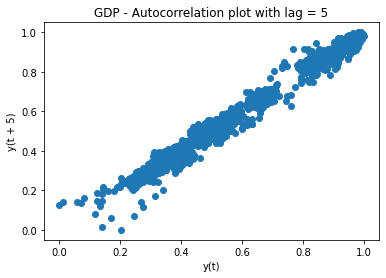

In [46]:
#checking cross-correlation  
import matplotlib.pyplot as plt                                                 # 그래프 확인을 위헤 pyplot을 import
from pandas.plotting import lag_plot                                            # 산점도 lag_plot 확인을 위해 import
import statsmodels.api as sm
#from statsmodels.tsa.arima_model import ARIMA                                  # 주가 예측을 위한 ARIMA 모델 
from sklearn.metrics import mean_squared_error

lag_plot(raw_data_scaled ['KOSPI'], lag = 5)  # 지연 : 5                        #KOSPI지수의 day t 와 day t+5의 상관관계
plt.title('GDP - Autocorrelation plot with lag = 5')
plt.show()
# Is there Auto-correlation in data? 
# reference : https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70

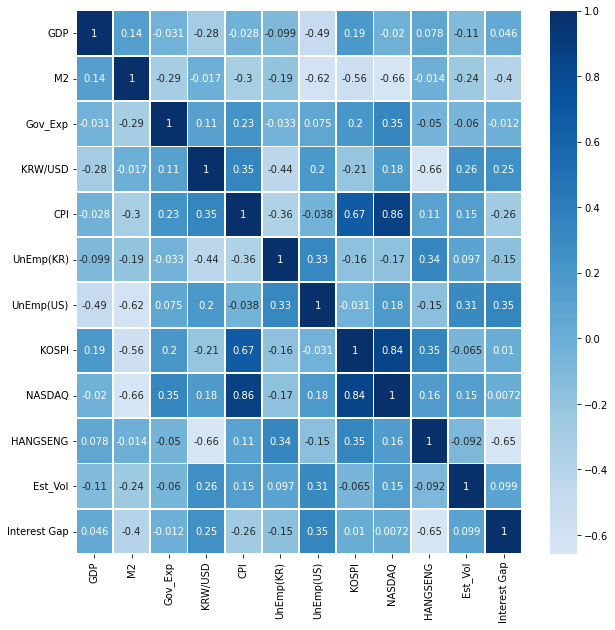

In [47]:
#참고 :보스턴 집값예측 모델
#reference : https://datascienceschool.net/03%20machine%20learning/06.04%20%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1%EA%B3%BC%20%EB%B3%80%EC%88%98%20%EC%84%A0%ED%83%9D.html
#다중 공선성(multicollineraity) : 독립 변수의 일부가 다른 독립 변수의 조학으로 표현 가능/ 독립변수간 강한 상호 상관 관계
#dfy = raw_data_scaled
#dfx = 
import seaborn as sns                                                           #시각화를 위한 seaborn 라이브러리 import

corr_matrix = raw_data_scaled.corr()
corr_matrix

sns.heatmap(corr_matrix,center=0,linewidths=0.8,cmap='Blues',annot=True)
plt.gcf().set_size_inches(10,10 )

In [48]:
# KOSPI변수와 상관관계가 높은 순서대로 출력
corr_order = corr_matrix.corr().loc[: "Interest Gap", 'KOSPI'].abs().sort_values(ascending = False)     #abs(): 상관계수 값을 양수로 변경, sort_values(ascending = False): 내림차순
corr_order

KOSPI           1.000000
NASDAQ          0.916011
CPI             0.811025
M2              0.640764
Gov_Exp         0.428172
HANGSENG        0.411884
UnEmp(KR)       0.236868
GDP             0.178784
KRW/USD         0.173175
Est_Vol         0.120886
Interest Gap    0.116409
UnEmp(US)       0.015390
Name: KOSPI, dtype: float64

In [49]:
# 데이터 분포를 시각화 한다. 상관 관계가 높은 데이터를 추출 
# plot_cols2 = ['KOSPI','M2','CPI', 'HANGSENG', 'KRW/USD','UnEmp(US)','NASDAQ','Interest Gap', 'UnEmp(KR)', 'Gov_Exp']  #GDP, Est_Vol은 상관 관계가 낮아 제외

# 장기적으로는 NASDAQ과 CPI, M2, Gov_Exp, HANGSENG 과 높은 상관관계
plot_cols2 = ['KOSPI','NASDAQ','CPI', 'M2','Gov_Exp', 'HANGSENG','Interest Gap', 'Est_Vol'] 
plot_df = raw_data_scaled .loc[:, plot_cols2]                                   # loc : 특정 부분 추출
plot_df

,KOSPI,NASDAQ,CPI,M2,Gov_Exp,HANGSENG,Interest Gap,Est_Vol
0,0.201438,0.019713,0.030601,0.8,0.406842,0.185741,0.939716,0.102849
1,0.210541,0.019713,0.030601,0.8,0.406842,0.185741,0.939716,0.078766
2,0.236229,0.019713,0.030601,0.8,0.406842,0.185741,0.939716,0.088550
3,0.243758,0.019713,0.030601,0.8,0.406842,0.185741,0.939716,0.277643
4,0.259817,0.019713,0.030601,0.8,0.406842,0.185741,0.943656,0.224630
...,...,...,...,...,...,...,...,...
1681,0.511093,0.583637,0.962735,1.0,0.559243,0.199477,0.189519,0.225963
1682,0.522010,0.583637,0.962735,1.0,0.559243,0.199477,0.190701,0.212453
1683,0.498141,0.583637,0.962735,1.0,0.559243,0.199477,0.182821,0.177620
1684,0.473595,0.583637,0.962735,1.0,0.559243,0.199477,0.391253,0.153979


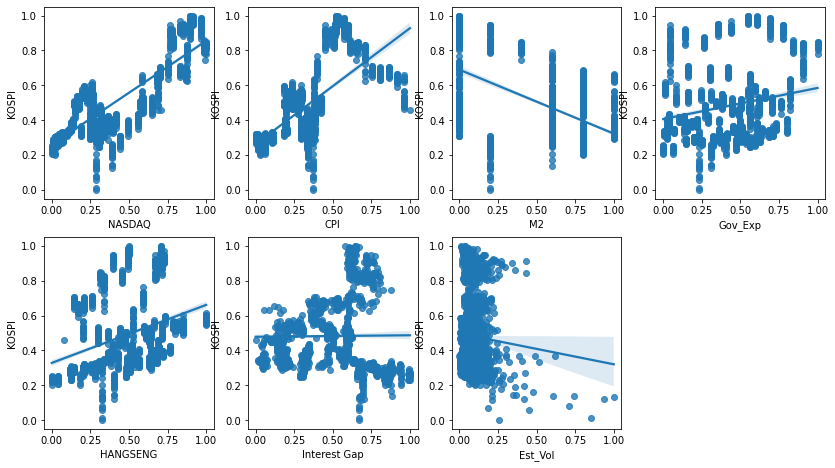

In [50]:
##regplot으로 KOSPI와의 선형 회귀선(추세선) 표시                                 # 선형회귀선의 위아래로 옅게 표시된 부분은 추세선의 95% 신뢰구간을 나타낸다.
plt.figure(figsize=(14,12))                                                     # figure의 size를 가로 14. 세로 12
for idx, col in enumerate(plot_cols2[1:]):                                      # enumerate 함수를 사용해 plot_cols2의 두 번째 항목부터 반복                          
  ax1=plt.subplot(3, 4, idx+1)                                                  # sub plot 9개를 표시하기 위해 설정
  sns.regplot(x=col, y=plot_cols2[0], data=plot_df, ax=ax1)                     # y axis : KOSPI, X axis : col
plt.show()

#선형회귀 대신 딥러닝을 사용한다. 이 셀은 데이터 확인용

way 1: 전일 데이터 들로 다음날을 예측. 5days to 1day.. ex) LSTM 주가 예측 <br>
way 2: 하루하루의 개별적 데이터로 KOSPI 지수 예측. 1day 데이터를 모아서.. ex) 

목표 : way 1처럼 시계열 LSTM/GRU을 하되 way 2처럼 여러 변수 상관관계를 첨가

ARIMA: AR, MA와 같은 고전적 통계기반시계열분석법을 사용한다.<br>
장점 : 모형 해석이 용이<br><br>
RNN, LSTM : 인공신경망<br>
단점: 모형 해석이 힘들다. 

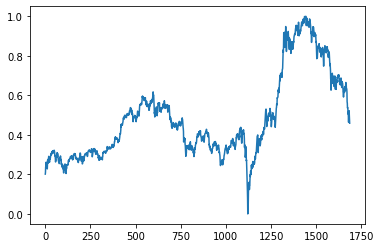

In [51]:
# KOSPI 지수 그래프 2015.08.24 ~2022.07.01
plot_df['KOSPI'].plot()                                                

#**7. 데이터 딥러닝 학습 및 성능분석 (Deep learning & Performance Analysis)**

In [52]:
# reference : https://data-analysis-expertise.tistory.com/67 에서 입력데이터의 feature을 9개 또는 10개

In [53]:
# LSTM many-to-one model 
# 과거 X일 동안의 가격을 사용해 1일 동안의 미래 가격을 예측한다.
# 현재 시점으로부터 4일 전까지의 데이터를 입력값으로 (5개 열), feature은 'KOSPI','NASDAQ','CPI', 'M2', 'Gov_Exp', 'HANGSENG' ,'Interest Gap', 'Est_Vol'
#                                                                                                                   제외: ''KRW/USD','UnEmp(US)','Interest Gap', 'UnEmp(KR)', 4개
# 3 차원 input : 
#                    samples(data_size) : window size(1)에 따라 슬라이싱 할 때 생기는 데이터의 개수       maybe XXXX lines 계산 필요 (영업일)
#                    time steps         : 과거 몇개의 데이터를 보는가                                  maybe 5 days
#                    feature            : X의 차원. (X의 변수의 개수)                                  maybe 8  'KOSPI','NASDAQ','CPI', 'M2', 'Gov_Exp', 'HANGSENG' ,'Interest Gap', 'Est_Vol'

# KOSPI value y = x1w1 + x2w2 + x3w3 + ... + x9w9
# 다중 선형 회귀의 경우 가중치 w 를 구해서 입력값 x 와 곱연산

# 다중 회귀 결과를 딥러닝 시킬 수 있을까 
# train data에서 정답을 KOSPI 값으로 놓고, 입력 feature n개를 딥러닝 돌리면 된다.
# 반복 학습으로 '추정된 KOSPI결과'와 '실제 KOSPI결과'를 비교하면서 딥러닝 Accuracy를 높인다.


In [54]:
#@markdown ![Image in a code cell]( https://drive.google.com/uc?export=view&id=1TVvqKJDMrjjm-uJr42gqkYdhomjtRJWs)


In [55]:
# 입력 데이터 재구성
def third_dimensionize(all_data, time_steps, for_periods,j):
    """
    목적: 
            1. 딥러닝용 입력 데이터를 train 용, test 용으로 분류한다.
            2. LSTM모델 사용을 위해 3차원 텐서로 데이터를 재구성한다.
    입력: 
            1. plot_df            : 이전에 정리한 데이터
            2. time step
            3. period
            4. j 번째 feature
    출력 :  
            1. X_train, y_train           :  2015.08.24 ~ 2021.06.30 의 데이터
            2. X_test, y_test             :  2021.07.01 ~ 2022.07.01 의 데이터
    """
    # train용, test용 데이터 분리
                                                                                # 2021.07.01 ~ 2022.07.01 의 영업일은 247일
                                                                                # 2015.08.24 ~ 2022.07.01 의 영업일은 1686일
    ts_train = all_data[:-248].iloc[:,j].values                                 # ts_train 데이터 : 2015.08.24 ~ 2021.06.30  데이터   2 차원    
                                                                                # ex) array([['0.201438','0.019713', '0.031785', '0.8'], ['0.210541','0.019713','0.031785','0.8'], ... , ]])                               
    ts_test = all_data[-247:-1].iloc[:,j].values                                          # ts_test  데이터 : 2021.07.01 ~ 2022.07.01 데이터    2 차원
    
    # train용 데이터를 samples와 tiem_steps로 슬라이싱하기 (5일 간격으로 1일 예측을 학습)
    X_train = []                                                                # X_train : 5일 치씩 3차원 묶음 데이터
    y_train = []                                                                # y_train : X_train에서 이어지는 1일 치씩 3차원 데이터
    #y_train_stacked = []
                                                                                # time_steps : 5
                                                                                # for_periods : 1

    for i in range(time_steps,len(ts_train) - 1):                               # for 문 : KOSPI_ts_train 데이터를 time_steps(사이즈:5 day)가 1회 훑고 갈동안 반복한다.
        X_train = np.append(X_train, ts_train[i - time_steps : i])              # t일~t+4일 배열 ~ 을 X_train에 append                              ex) [ts_train[0],[1],[2],[3],[4], ts_train[1],[2],[3],[4],[5], ... ]                 
        y_train = np.append(y_train, ts_train[i: i + for_periods])              # X_train의 다음 데이터(t + 5 일)배열을 1일 씩 y_tran에 append      ex) [KOSPI_ts_train[5], KOSPI_ts_train[6],  ... tKOSPI_s_train[251]]
    X_train = np.array(X_train)                                                 # X_train 배열을 numpy 배열로 만든다    .                          
    y_train = np.array(y_train)                                                 # y_train 배열을 numpy 배열로 만든다.   
    # 2차원 텐서로 재구성
    # np.reshapes(samples, time_steps, features)로 재구성
    X_train = np.reshape(X_train,(-1, 5))                                       # X_train : (X_train의 행의 개수, X_train의 열의 개수, feature = 1)    

    # X_test 생성
    inputs = all_data.iloc[:,j].values                                          # inputs 데이터: ['0.2014', '0.2105', ..., '0.XXX']
    inputs = inputs[len(inputs)-len(ts_test) - time_steps:]                     # inputs 데이터: 2021.07.01 ~ 2022.07.01의 데이터 
    inputs = inputs.reshape(-1,1)                                               # reshape      : 행: -1, 열: 1  :  [['0.2014'], ['0.2105'], ..., ['0.XXX']]
    
    X_test = []
    y_test = []
    for i in range(time_steps, len(ts_test)+ time_steps- for_periods):          # time_stemps 만큼씩 데이터 묶음을 만든다.
        X_test.append(inputs[i-time_steps:i])
        y_test.append(inputs[i])
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    #print("\n\n ytest = ", y_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
    #print('X_train : ', X_train, '\n, y_train: ' , y_train , '\n, X_test: ', X_test)
    return X_train, y_train, X_test, y_test                                             # return : 생성돤 X_train, y_train, X_test 값을 반환

#'KOSPI','NASDAQ','CPI', 'M2'
KOSPI_X_train, KOSPI_y_train, KOSPI_X_test, KOSPI_y_test           = third_dimensionize(plot_df, 5, 1,0)   #KOSPI      #(데이터프레임. time_steps, for_periods, j열)
NASDAQ_X_train, NASDAQ_y_train, NASDAQ_X_test, NASDAQ_y_test       = third_dimensionize(plot_df, 5, 1,1)   #NASDAQ
CPI_X_train, CPI_y_train, CPI_X_test, CPI_y_test                   = third_dimensionize(plot_df, 5, 1,2)   #CPI
M2_X_train, M2_y_train, M2_X_test, M2_y_test                       = third_dimensionize(plot_df, 5, 1,3)   #M2
Gov_Exp_X_train, Gov_Exp_y_train, Gov_Exp_X_test, Gov_Exp_y_test   = third_dimensionize(plot_df, 5, 1,3)   #Gov_Exp
HANGSENG_X_train, HANGSENG_y_train, HANGSENG_X_test, HANGSENG_y_test                           = third_dimensionize(plot_df, 5, 1,3)   #HANGSENG
Interest_Gap_X_train, Interest_Gap_y_train, Interest_Gap_X_test, Interest_Gap_y_test           = third_dimensionize(plot_df, 5, 1,0)   #interest_gap
Est_Vol_X_train, Est_Vol_y_train, Est_Vol_X_test, Est_Vol_y_test                               = third_dimensionize(plot_df, 5, 1,0)   #Est_Vol

#이상으로 2차원 리스트 획득
#여기서 y train은 코스피 하나만 필요할 것 같다고 생각됨

# 2차원 리스트를3차원 텐서로 데이터 결합
print("KOSPI len", len(KOSPI_X_train))        
Temp1 = np.empty((0,5)) 
Temp2 = np.empty((0,5)) 
#X_train = np.empty((0,4,5))                                                     # 1432
X_train = []
X_test  = []
#print('X_train', X_train.shape)


for i in range (len(KOSPI_X_train)):                                            # 1432번 반복
    #print('X_train', X_train)
    Temp1 = np.append(Temp1, np.array([KOSPI_X_train[i]]), axis = 0)
    Temp1 = np.append(Temp1, np.array([NASDAQ_X_train[i]]), axis = 0)
    Temp1 = np.append(Temp1, np.array([CPI_X_train[i]]), axis = 0)
    Temp1 = np.append(Temp1, np.array([M2_X_train[i]]), axis = 0)               # Temp1 : [[0.20111, 0.21XXXX , 0.21XXX, 0.21XXX, 0.21XXX], [0.01973, 0.01973, 0.01973, 0.01973, 0.01973], [...], [...]]
    Temp1 = np.append(Temp1, np.array([Gov_Exp_X_train[i]]), axis = 0)
    Temp1 = np.append(Temp1, np.array([HANGSENG_X_train[i]]), axis = 0)
    Temp1 = np.append(Temp1, np.array([Interest_Gap_X_train[i]]), axis = 0)
    Temp1 = np.append(Temp1, np.array([Est_Vol_X_train[i]]), axis = 0)
    print('Temp1', Temp1)
    #Temp1 = [KOSPI_X_train[i], NASDAQ_X_train[i], CPI_X_train[i], M2_X_train[i]]
    #print(Temp1)
    #X_train = np.append(X_train, np.array([[Temp1]]), axis = 0)
    X_train.append(Temp1) 
    Temp1 = np.empty((0,5))                  
for i in range (len(KOSPI_X_test)):                                            # 1432번 반복
    #print('X_train', X_train)
    Temp2 = np.append(Temp2, np.array([KOSPI_X_test[i]]), axis = 0)
    Temp2 = np.append(Temp2, np.array([NASDAQ_X_test[i]]), axis = 0)
    Temp2 = np.append(Temp2, np.array([CPI_X_test[i]]), axis = 0)
    Temp2 = np.append(Temp2, np.array([M2_X_test[i]]), axis = 0)               # Temp2 : [[0.20111, 0.21XXXX , 0.21XXX, 0.21XXX, 0.21XXX], [0.01973, 0.01973, 0.01973, 0.01973, 0.01973], [...], [...]]
    Temp2 = np.append(Temp2, np.array([Gov_Exp_X_test[i]]), axis = 0)
    Temp2 = np.append(Temp2, np.array([HANGSENG_X_test[i]]), axis = 0)
    Temp2 = np.append(Temp2, np.array([Interest_Gap_X_test[i]]), axis = 0)
    Temp2 = np.append(Temp2, np.array([Est_Vol_X_test[i]]), axis = 0)
    print('Temp2', Temp2)
    X_test.append(Temp2) 
    Temp2 = np.empty((0,5))  

y_train = KOSPI_y_train
y_test  = np.array(KOSPI_y_test)
y_test = np.ravel(y_test, order ='C')
#X_test = np.array([KOSPI_X_test, NASDAQ_X_test, CPI_X_test, M2_X_test])
#KOSPI_y_train  = np.reshape(KOSPI_y_train, (KOSPI_y_train[0],1))
X_train = np. array(X_train)
X_test = np. array(X_test)

print("\nreal_X_train" ,   X_train)
print("\nreal_y_train" ,   y_train)

print("\nreal_X_test" ,   X_test)
print("\nreal_y_test" ,   y_test)


print("\n\nX_train shape",X_train.shape)
print("y_train.shape" ,   y_train.shape)
print("X_test.shape" ,    X_test.shape)
print("y_test.shape" ,    y_test.shape)
# 결과:
# X_train 3차원 텐서 : real_X_train
# y_train 1차원 리스트 : real_y_train                                           # ex)  [0.26188453 0.24713001 0.24766585 ... 0.98965668 0.99871723 0.99820305] 
# X_test 3차원 텐서 : real_X_test
# y_test 1차원 리스트 : real_y_test
'''
    원하는 X_train의 결과: array([

                                            [[KOSPI_day1, KOSPI_day2, KOSPI_day3, KOSPI_day4, KOSPI_day5],
                                            [NASDAQ_day1, NASDAQ_day2, NASDAQ_day3, NASDAQ_day4, NASDAQ_day5],
                                            [CPI_day1, CPI_day2, CPI_day3, CPI_day4, CPI_day5],
                                            [M2_day1, M2_day2, M2_day3, M2_day4,  M2_day5]],

                                            [[KOSPI_day2, KOSPI_day3, KOSPI_day4, KOSPI_day5, KOSPI_day6],
                                            [NASDAQ_day2, NASDAQ_day3, NASDAQ_day4, NASDAQ_day5, NASDAQ_day6],
                                            [CPI_day2, CPI_day3, CPI_day4, CPI_day5, CPI_day6],
                                            [M2_day2, M2_day3, M2_day4, M2_day5, M2_day6]],

                                            ...

                                            [[KOSPI_day1XXX, KOSPI_day1XXX, KOSPI_day1XXX, KOSPI_day1XXX],
                                            [NASDAQ_day1XXX, NASDAQ_day1XXX, NASDAQ_day1XXX, NASDAQ_day1XXX],
                                            [CPI_day1XXX, CPI_day1XXX, CPI_day1XXX, CPI_day1XXX],
                                            [M2_day1XXX, M2_day1XXX, M2day1XXX, M2_day1XXX]]

                                    ])

'''







스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.37748502 0.38856444 0.37544992 0.39446949 0.40526205]
 [0.37748502 0.38856444 0.37544992 0.39446949 0.40526205]]
Temp1 [[0.38856444 0.37544992 0.39446949 0.40526205 0.41764047]
 [0.41426731 0.41426731 0.41426731 0.41426731 0.41426731]
 [0.38010606 0.38010606 0.38010606 0.38010606 0.38010606]
 [0.6        0.6        0.6        0.6        0.6       ]
 [0.6        0.6        0.6        0.6        0.6       ]
 [0.6        0.6        0.6        0.6        0.6       ]
 [0.38856444 0.37544992 0.39446949 0.40526205 0.41764047]
 [0.38856444 0.37544992 0.39446949 0.40526205 0.41764047]]
Temp1 [[0.37544992 0.39446949 0.40526205 0.41764047 0.42284731]
 [0.41426731 0.41426731 0.41426731 0.41426731 0.41426731]
 [0.38010606 0.38010606 0.38010606 0.38010606 0.38010606]
 [0.6        0.6        0.6        0.6        0.6       ]
 [0.6        0.6        0.6        0.6        0.6       ]
 [0.6        0.6        0.6        0.6        0.6       ]
 [0.37544992 0.3944694

'\n    원하는 X_train의 결과: array([\n\n                                            [[KOSPI_day1, KOSPI_day2, KOSPI_day3, KOSPI_day4, KOSPI_day5],\n                                            [NASDAQ_day1, NASDAQ_day2, NASDAQ_day3, NASDAQ_day4, NASDAQ_day5],\n                                            [CPI_day1, CPI_day2, CPI_day3, CPI_day4, CPI_day5],\n                                            [M2_day1, M2_day2, M2_day3, M2_day4,  M2_day5]],\n\n                                            [[KOSPI_day2, KOSPI_day3, KOSPI_day4, KOSPI_day5, KOSPI_day6],\n                                            [NASDAQ_day2, NASDAQ_day3, NASDAQ_day4, NASDAQ_day5, NASDAQ_day6],\n                                            [CPI_day2, CPI_day3, CPI_day4, CPI_day5, CPI_day6],\n                                            [M2_day2, M2_day3, M2_day4, M2_day5, M2_day6]],\n\n                                            ...\n\n                                            [[KOSPI_day1XXX, KOSPI_day1XXX, KOSPI_day1XXX

**LSTM**

In [56]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.layers import LSTM, GRU,SimpleRNN

# CNN - LSTM model setting
CNN = Sequential()                                                              # Sequential : 레이어를 선형으로 구성
CNN.add(LSTM(512, input_shape = (X_train.shape[1], X_train.shape[2])))          # many-to-many 의 경우 return_sequences = True (default : False), tanh: -1~ +1
                                                                                # input_shape: (6,5) 
                                                                                # timp_steps: 5, units: 1
CNN.add(Dense(256, activation = 'relu'))   
#CNN.add(Dropout(0.3))
CNN.add(Dense(64, activation = 'relu'))   
#CNN.add(Dropout(0.3))
CNN.add(Dense(16, activation = 'relu'))  
#CNN.add(Dropout(0.3)) 
CNN.add(Dense(1))                                                               # The time step of the output 
CNN.summary()                                                                   # model summary

# model compile                                                                
CNN.compile(optimizer= 'adam', loss = 'mean_squared_error',metrics='acc') # optimizer : adam, loss : MSE. 예측한 값과 실제 값 사이의 평균 제곱 오차를 정의한다. 차이가 커질수록 제곱 연산으로 인해 오차가 양수이든 음수이든 누적 값을 증가시킨다.
                                                                                
# model fitting
CNN.fit(X_train, y_train, epochs = 30, batch_size = 100)                        # epoch = 전체 트레이닝 셋이 신경망을 통과한 횟수. (전체 데이터 셋에서 전체 데이터를 N 번 학습)
# model prediction                                                              # batch_size = 한 번의 batch마다 주는 데이터 샘플의 size
CNN_predictions = CNN.predict(X_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1060864   
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,209,697
Trainable params: 1,209,697
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
15/15 [============================

(0.0012341421, <matplotlib.axes._subplots.AxesSubplot at 0x7f42246da790>)

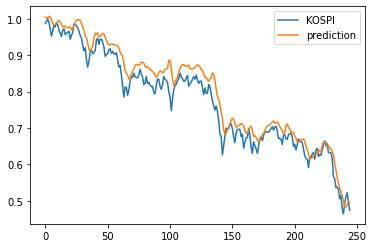

In [57]:
# 실제 KOSPI 결과와 LSTM 예측 결과를 그래프로 표시
def actual_pred_plot(preds):
    """
    Plot the actual vs predition
    """
    actual_pred = pd.DataFrame(columns = ['KOSPI', 'prediction'])
    actual_pred['KOSPI'] = y_test
    actual_pred['prediction'] = preds[:,0]
    
    from keras.metrics import MeanSquaredError 
    m = MeanSquaredError()
    m.update_state(np.array(actual_pred['KOSPI']), np.array(actual_pred['prediction']))
    
    return (m.result().numpy(), actual_pred.plot())

actual_pred_plot(CNN_predictions)


In [58]:
#CNN_prediction_real = CNN_predictions *

In [59]:
#예측한 KOSPI값들 2021.07.01~2022.07.01
CNN_predictions

array([[1.0043418 ],
       [1.0029888 ],
       [1.0041362 ],
       [1.0073596 ],
       [1.0045731 ],
       [0.99742955],
       [0.98630434],
       [0.9839796 ],
       [0.98659056],
       [0.98698467],
       [0.9923596 ],
       [0.9958257 ],
       [0.9908281 ],
       [0.9847271 ],
       [0.9778735 ],
       [0.97879344],
       [0.9803578 ],
       [0.97635347],
       [0.9757228 ],
       [0.97713375],
       [0.97771   ],
       [0.97013205],
       [0.97540075],
       [0.980651  ],
       [0.9909273 ],
       [0.9960386 ],
       [0.9978113 ],
       [0.99831486],
       [0.99512196],
       [0.98720175],
       [0.979646  ],
       [0.96757215],
       [0.95411336],
       [0.9486355 ],
       [0.9337658 ],
       [0.91634697],
       [0.9119602 ],
       [0.918878  ],
       [0.92367625],
       [0.9494013 ],
       [0.96046025],
       [0.95828474],
       [0.96144587],
       [0.95197684],
       [0.95085347],
       [0.95552605],
       [0.95967567],
       [0.957

In [60]:
#실제 KOSPI값들 2021.07.01~2022.07.01
y_test

array([0.98731848, 0.99350498, 1.        , 0.98924533, 0.97156806,
       0.9527704 , 0.96820689, 0.98168946, 0.97813344, 0.98972163,
       0.98468258, 0.96689165, 0.96075386, 0.95166624, 0.97023117,
       0.97250984, 0.95655916, 0.96066184, 0.96300546, 0.96613931,
       0.94431064, 0.95552537, 0.96315701, 0.98656073, 0.98426041,
       0.98113739, 0.97575735, 0.96643158, 0.95421554, 0.94759062,
       0.9275156 , 0.91225231, 0.92082573, 0.88775527, 0.86755576,
       0.88363093, 0.90965972, 0.91426577, 0.90437169, 0.90727821,
       0.91284769, 0.94265982, 0.94685452, 0.92998371, 0.94362866,
       0.9448573 , 0.93624599, 0.92302321, 0.89688618, 0.90287242,
       0.90400905, 0.91535909, 0.91783261, 0.90521604, 0.91085588,
       0.9038575 , 0.90259097, 0.90713748, 0.88780398, 0.86742586,
       0.87205356, 0.84518584, 0.81432909, 0.78517729, 0.8128623 ,
       0.81115195, 0.78954519, 0.80471647, 0.82865602, 0.84295588,
       0.8384202 , 0.85052258, 0.84191127, 0.83877201, 0.83813

In [61]:
CNN.evaluate(X_test, y_test)

8/8 [==============================] - 1s 25ms/step - loss: 0.0012 - acc: 0.0041


[0.001234142342582345, 0.004081632476300001]

In [62]:
# 예측 성능 확인
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
def confirm_result(y_test, CNN_predictions):
    MAE = mean_absolute_error(y_test, CNN_predictions)
    RMSE = np.sqrt(mean_squared_error(y_test, CNN_predictions))
    MSLE = mean_squared_log_error(y_test, CNN_predictions)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, CNN_predictions))
    R2 = r2_score(y_test, CNN_predictions)

    pd.options.display.float_format = '{:.5f}'.format
    Result = pd.DataFrame(data = [MAE, RMSE, MSLE, RMSLE, R2],
                          index = ['MAE', 'RMSE', 'MSLE','RMSLE', 'R2'],
                          columns=['Results'])
    return Result
confirm_result(y_test, CNN_predictions)

,Results
MAE,0.02825
RMSE,0.03513
MSLE,0.00039
RMSLE,0.01965
R2,0.92626


# **8. Review**

**박수영**<br>
  이번 학기에 '인공지능 기초와 활용' 교과목을 배우면서 실생활에 사용할 수 있는지가 궁금했다. 좋은 기회라 판단하여 본 프로젝트에 참여하였다. 수업시간에 배운 RNN, CNN, 자연어 처리 등을 사용하고자 하였다. 처음에는 증권사 API를 사용하려고 컴퓨터에 증권사 프로그램도 설치 해보고 계좌도 만들며 어려운 시간을 보냈다. 결국 코랩이라는 플랫폼을 사용하였다. 이 유능한 딥러닝 플랫폼을 개발한 구글에 감사를 표하고 싶다. 
<br>제일 먼저 한 것을 경제 지표를 크롤링하는 것이 었는데, 수업시간에 배우는 자료구조와 같이 이론적인 것 프로그래밍 밖에 몰랐던 내게는 첫 번쨰, 고비였다. 참고자료들을 참고해서 필요에 맞게 적용했다. 두 번쨰는 수집한 데이터를 가공하는 일이다. 내가 원하는 목적으로 데이터를 가공하기 위해 많은 시간을 보냈고 어려웠다. 세 번째로 한 것은 기존 수업시간에 배웠던 인공지능 모델 (LSTM)을 사용해 학습을 시키는 것이다. 학습결과는 언뜻 보기에는 정확도가 높아보이나, 전일의 데이터를 오른 쪽으로 밀어놓은 것 같은 그래프를 얻었다. 이는 인공지능 모델이 Loss를 줄이기 위해 익일의 데이터가 금일과 동일하다고 가정했기 때문으로 추정된다. 약 3달 정도의 KOSPI주가를 예측하고자 하였지만, 프로젝트의 결과는 실용적이지 못했다. 이 점이 가장 아쉬웠다. KOSPI지수 예측이 더 실용적이기 위해서는 인공지능 모델의 손실 및 학습 구조에 근본적인 해결책을 찾아야 할 것이다.이 프로젝트를 통해 이론으로만 알고있었던 딥러닝을 실제 사회에 적용해 볼 수 있었다. 또한, 내가 모르던 경제 분야를 간접적으로 배울 수 있어 협업과 교류의 중요성을 알 수 있었다.
<font color="Yellow"></font>
<br>
<br>
**이동환** <br>
 '금융통계'라는 과목을 마지막 학기에 들으며 금융자산으로부터 정량적인 통계치를 얻어내는 여러 방식을 접했다. 이후 금융자산을 평가하기 위한 더욱 다양하고 심화된 방법들에 대해 검색해 보던 중, 최근 몇 년간 화제가 되었던 딥러닝과 머신러닝 등의 기법들을 적용할 수 있음을 알게 되었고, 이것들을 금융 시계열 데이터에 적용하면 어떤 장점이 있고 기존의 시계열 모형에 비해 어떠한 우위를 갖는지에 대해 직접 구현을 통해 확인해보고 싶었다.<br>

 비전공자로서의 한계로, 모델을 구성하고 딥러닝을 시키는 과정에 직접적으로 참여하기 힘들었지만, 실제 내가 구성한 데이터를 가지고 텐서를 구성하고, 모델을 설정하며 학습을 시키는 일련의 과정을 눈으로 확인해 보면서 아예 잘 몰랐던 분야에 대해 이해도를 높이는 좋은 시간이 되었다.

#**9. 참고 자료 (Reference)**

학술 - LSTM을 이용한 주가예측 모델의 학습방법에 따른 
성능분석 (정종진, 김지연)<br><br>
학술 - 머신 러닝 방법과 시계열 분석 모형을 이용한 
부동산 가격지수 예측(배성완, 유정석)
<br><br>
학술 - SNS와 뉴스기사의 감성분석과 기계학습을 이용한 주가예측 모형에 관한 연구 (김동영)<br><br>
학술 - LSTM과 양방향 순환신경망을 이용한 주가 예측모델 비교연구 (이종혁)
도서 - 밑바닥부터 시작하는 딥러닝<br><br>
도서 - 코딩은 처음이라 with 딥러닝<br><br>
도서 - 토닥토닥 파이썬 - 머신 러닝 추가문제: https://wikidocs.net/book/3682<br><br>
도서 - 파이썬으로 배우는 알고리즘 트레이딩 (개정판-2쇄): https://wikidocs.net/book/110<br><br>
도서 - 퀀트 전략을 위한 인공지능 트레이딩<br><br>
블로그 - [시계열] 주가 예측을 위한 RNN/LSTM/GRU 기술적 가이드 : https://diane-space.tistory.com/331<br><br>
블로그 - [머신러닝 입문]-5 회귀(Regression)-보스턴 주택가격예측 : https://liz09045.tistory.com/95<br><br>
블로그 - 딥러닝 초보들의 실수:https://codingapple.com/unit/deep-learning-stock-price-ai/<br><br>
블로그 - 신경망(딥러닝) : https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-8-%EC%8B%A0%EA%B2%BD%EB%A7%9D%EB%94%A5%EB%9F%AC%EB%8B%9D/<br><br>
블로그 - [LSTM] Understanding Input And Output Shapes (LSTM 입출력 Shapes) : https://kimmisol.com/lstm-understanding-input-and-output-shapes-lstm-%EC%9E%85%EC%B6%9C%EB%A0%A5-shapes/<br><br>

블로그 - 시계열 예측: LSTM 모델로 주가 예측하기 : https://insightcampus.co.kr/2021/11/11/%EC%8B%9C%EA%B3%84%EC%97%B4-%EC%98%88%EC%B8%A1-lstm-%EB%AA%A8%EB%8D%B8%EB%A1%9C-%EC%A3%BC%EA%B0%80-%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0/<br><br>
블로그 - 다중공선성과 변수 선택 : https://datascienceschool.net/03%20machine%20learning/06.04%20%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1%EA%B3%BC%20%EB%B3%80%EC%88%98%20%EC%84%A0%ED%83%9D.html<br><br>
블로그 - RNN에 들어가는 데이터 input shape : https://wyatt37.tistory.com/13<br><br>

블로그 - Time-Series Forecasting: Predicting Stock Prices Using An ARIMA Model: https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70<br><br>
블로그 - [LSTM/GRU]주식가격 예측 모델 구현하기 https://data-analysis-expertise.tistory.com/67<br><br>

블로그 - 주식 분석 개발환경 설정 - 파이썬 환경 설정 및 실행 : https://excelsior-cjh.tistory.com/105<br><br>

블로그 - 딥러닝 Keras에서 loss함수의 종류와 선택 방법 및 코드 : https://durian9s-coding-tree.tistory.com/2<br><br>

블로그 - 왜 직관적인 MAE 말고 RMSE를 쓰시나요 : https://data101.oopy.io/mae-vs-rmse<br><br>
블로그 - iloc, loc를 사용한 행/열 선택법 from Pandas df : https://azanewta.tistory.com/34<br><br>

깃허브 - GJR-GARCH model : https://github.com/olekssy/quant-finance/blob/master/tutorials/GJR-GARCH.ipynb<br><br>
깃허브 - ARIMA, Python으로 하는 시계열분석 (feat. 비트코인 가격예측)
 : https://byeongkijeong.github.io/ARIMA-with-Python/<br><br>
깃허브 - 한국 주식 및 암호화폐까지 데이터 요청 :
https://financedata.github.io/posts/finance-data-reader-users-guide.html<br><br>
기타 - 서울시립대학교 교양교과목 "인공지능기초와활용" 교육자료


#**10.  도서 '퀀트 전략을 위한 인공지능 트레이딩' 요약 (Referenced Book Summary)**


In [63]:
#                                   '퀀트 전략을 위한한 인공지능 트레이딩' 요약
#
#   데이터처리과정
#
#   1.RAW data 불러오기 (Ok.)
#   2.Data 가공 및 결합하기 (Ok.)
#   3.훈련,검증,테스트 데이터셋 분리하기 (To Do)
#   4.학습에 용이하도록 데이터 정규화(min-max normal)하기 (To Do)
#   5.특성 데이터, 레이블 데이터 나누기 (To Do)
#
#   1장 - 머신러닝   #
##########################################################################################################
#   금융데이터 머신러닝 알고리즘 : 지도학습(SVM/Random Forest/부스팅/XGBoost/LightGBM/CatBoost) -> 금융에서 부스팅보다 배깅이 선호된다고 한다.
#                           비지도 학습 - 차원 축소와 클러스터링
#
#   교차검증법 k-fold/walk-forward/blocking walk-forward, 퍼징/엠바고
#
#   금융시계열데이터 전처리 (노이즈제거) -> 오토인코더 추천 (적층오토인코더 Stacked AutoEncoder) 활용 -> 업계표준이라고 함.
#
#   평가지표 : 정확도/정밀도/F1/AUC-ROC. 회귀시 MSE, R-squared (52~56% 정도의 정확도가 적절하다고 합니다.)
#
#   머신러닝 시계열 트렌드 예측시 : 레이블 데이터 +1 or -1 레이블링 <- 비합리적
#                            상승률에 따라 다른 가중치 부여 (이진 분류 -> 다중 분류)
#   레이블 데이터 불균형 문제 : 시장 상황에 따른 데이터 불균형 문제 (ex: 주가상승기 모델링 -> 실제 적용시 경기하강국면이라면 문제가 된다)
#                         등락 횟수가 비슷하게 레이블링을 하거나, AUC-ROC 같은 측정지표를 활용해본다.
#   수익률 지표 : 산술평균보다 기하평균수익률이 적절. (cf: 기하평균 => exp[Sigma[log(1+Rt)]의 * n분의 1]), Rt: t시점 수익률
#
#
#   백테스팅 : 최소 10넌 데이터...??? 가 적절.. , 그러나 시장 상황이 과거와 비슷하게 돌아간다는 가정은 비현실적이기 백테스팅 맹신은 위험
#            최대한 많은 경제적 시나리오를 포함하는 백테스팅 기간 설정
#           (이 부분은 제가 생각해 볼게요. 최근 1년 동안 꾸준한 하락장이라 데이터에 편향이 있을 것 같네요.)
#   수수료 + 슬리피지(시장 주문량에 따라 일정 가격으로 주문할 수 있는 양이 제한됨) 문제 고려
#   편향 : 생존편향(상폐당하지 않은 종목만 고려하여 백테스팅)
#         사전관찰편향(3월의 경제지표가 4월말에 발표되는 문제) <- 이건 fillna (ffill/bfill)순서활용해서 조정해볼게요.
#
#   전체 자산 종류나 투자 영역에 대한 모델 개발이 좋다.(이 지점에서 코스피를 먼저 분석하는게 좋은 것 같아요. 모든 주식을 포함하니까요)
#   여러가지 지표 : 수익률 외 변동성/샤프비율/최대 낙폭/소르티노지수/트레이너지수/젠센의 알파
##########################################################################################################



#   2장 - 딥러닝 개괄  #
##########################################################################################################
#   사이킷런 활용 전 치트시트를 한 번 확인해보자.
#   CNN : 1D - 합성곱 방법을 쓰거나, 수치데이터를 이미지데이터로 변환 후 분석.
#   RNN : 순환 신경망, 역전파 사용 -> 데이터가 너무 길어지면 그래디언트 작아져 학습이 안되는 문제 -> LSTM으로 해결
#         주가 데이터에 LSTM 추천, but 패턴이 없는 주가의 경우 RNN이 학습하기 어려울 수도  [매우 장기의 데이터라면면 패턴턴 발견견 될될 수도]
#   비지도학습 : 오토인코더가 대표적(Sparse,Denoising,Contractive...오토인코더) 벡터 X 입력 후 유사 벡터 X출력, 입출력 노드 개수 같음

#   생성모델 : GAN(적은 데이터로 효과적) / VAE(못지않게 자주 활용) / Hidden Markov Model
#
#   연구논문   [Financial Time Series Forecasting with Deep Learning: A Systemic Literature Review: 2005~2019]
#            요약 : 'RNN의 LSTM이 우위지만, 머신러닝이 더 성능이 좋을 수도 있다.
#
#   퀀트피디아 사이트 : www.quantpedia.com
#
#   모듈 : 케라스 > 텐서플로, 파이토치 순으로 어렵다.
#
##########################################################################################################

#   3장 - 딥러닝 이용 투자전략  #
##########################################################################################################
#   주가 캔들차트를 차원축소 이미지로 변환, 이미지 데이터 분석에 뛰어난 CNN으로 학습하는 예제
#   논문 : Using Deep Learning Neural Networks and Candlestick Chart Representation to Predict Stock Market
#   
#   모델구조 짜기 : 케라스의 "함수형 API"를 활용, 신경망 모델을 생성한다.
#   모델 학습하기
#
#   RNN,LSTM을 활용한 주가 방향성 분류 예측
#   논문 : Application of Deep Learning to Algorithmic Trading(2017)
#
#   특징 : 변수 3개 활용, 시장 인덱스 S&P 500, 변동성 지수 VIX, 반도체 지수 SOX
#   데이터 구조 : 497묶음 of (특성 22개 x 5일치)
#   모델구조 : LSTM(케라스 지원, 5개 층, 200개 뉴런)
#   모델 학습 : ...
#
#   오토인코더를 활용한 주가 데이터 생성
#   특징 : x개 변수 input, x개 변수 output
#   데이터 처리 : 수정 종가 이용 로그수익률 데이터, 정규화
#   데이터 구조 : 5023묶음 of (특성 1개, 10일치)
#   모델 구조 : 다층 퍼셉트론(MLP), 다충 퍼셉트론 모델에 배치층 추가(인코더 : 차원 축소층, 디코더 : 차원 확장층)
##########################################################################################################


